In [1]:
using Flux

In [2]:
NN = Chain(Dense(10 => 32,tanh),
        Dense(32 => 32,tanh),
        Dense(32 => 5))

Chain(
  Dense(10 => 32, tanh),                # 352 parameters
  Dense(32 => 32, tanh),                # 1_056 parameters
  Dense(32 => 5),                       # 165 parameters
)                   # Total: 6 arrays, 1_573 parameters, 6.520 KiB.

In [3]:
loss() = sum(abs2,sum(abs2,NN(rand(10)).-1) for i in 1:100)
loss()

┌ Warning: Layer with Float32 parameters got Float64 input.
│   The input will be converted, but any earlier layers may be very slow.
│   layer = Dense(10 => 32, tanh)
│   summary(x) = 10-element Vector{Float64}
└ @ Flux /Users/joseignacioperdiguerogarate/.julia/packages/Flux/Wz6D4/src/layers/stateless.jl:60


2405.777f0

In [4]:
NN[1].weight

32×10 Matrix{Float32}:
  0.019796   -0.36744     0.279191   …   0.301333    0.212058   -0.0970274
 -0.16661     0.332253   -0.0310069     -0.094894   -0.251584    0.116375
  0.0477913  -0.0148223   0.327652      -0.0639743   0.19641    -0.0895353
  0.0951824  -0.358924    0.106305       0.365404    0.0820009  -0.313676
 -0.228387   -0.21571     0.271533       0.162513   -0.0127874  -0.342995
 -0.0488471  -0.0187681   0.0192132  …  -0.151018    0.270957    0.173334
 -0.0391366  -0.346158   -0.32911       -0.36757     0.0972548   0.176175
  0.177328    0.359752   -0.0220228     -0.160957   -0.115917    0.157603
  0.259477   -0.241465   -0.189761      -0.0289517  -0.237018   -0.0244101
  0.354356   -0.377002   -0.319362      -0.345352   -0.244338   -0.202475
  ⋮                                  ⋱                          
  0.122851   -0.220512    0.233276       0.16819     0.0730844   0.216889
 -0.282711   -0.305712   -0.0790413     -0.119347   -0.348648   -0.10446
 -0.29591     0.251039

In [5]:
p = Flux.params(NN)

Params([Float32[0.019796008 -0.36744022 … 0.21205825 -0.09702737; -0.16661 0.33225277 … -0.25158393 0.11637466; … ; -0.11785284 0.26661298 … 0.28783035 0.16943885; 0.21804544 -0.08951702 … 0.21519001 0.3399002], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.08866767 0.053969223 … 0.16720137 0.15705554; -0.24011914 -0.030060323 … -0.14988339 -0.20558272; … ; 0.0011598682 -0.27156147 … 0.27784383 0.2469767; -0.120582424 -0.22522818 … 0.14676802 -0.22275858], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.35187665 0.27147096 … 0.29069808 -0.1084776; 0.2844048 -0.21104576 … 0.03984381 0.3219722; … ; -0.28826815 -0.02167456 … 0.11272588 -0.16880228; 0.06417337 -0.36603445 … 0.008371273 0.31623715], Float32[0.0, 0.0, 0.0, 0.0, 0.0]])

In [6]:
Flux.train!(loss, p, Iterators.repeated((), 10000), ADAM(0.1))

In [7]:
loss()

5.1862942f-5

An example on how to solve a simple differential equation

In [12]:
NNODE = Chain(x -> [x], # Take in a scalar and transform it into an array
        Dense(1 => 32,tanh),
        Dense(32 => 1),
        first) # Take first value, i.e. return a scalar
        
NNODE(1.0)

0.13169955f0

In [13]:
g(t) = t*NNODE(t) + 1f0

g (generic function with 1 method)

In [14]:
using Statistics
ϵ = sqrt(eps(Float32))
loss() = mean(abs2(((g(t+ϵ)-g(t))/ϵ) - cos(2π*t)) for t in 0:1f-2:1f0)

loss (generic function with 1 method)

In [15]:
opt = Flux.Descent(0.01)
data = Iterators.repeated((), 5000)
iter = 0
cb = function () #callback function to observe training
  global iter += 1
  if iter % 500 == 0
    display(loss())
  end
end
display(loss())
Flux.train!(loss, Flux.params(NNODE), data, opt; cb=cb)

0.52905409819458

0.48921782141938

0.4461156537085335

0.30083489644011985

0.06805544407964141

0.011259099075791958

0.006449971312317532

0.005707172047948818

0.005421403379641928

0.005184331688370484

0.0049613258705370165

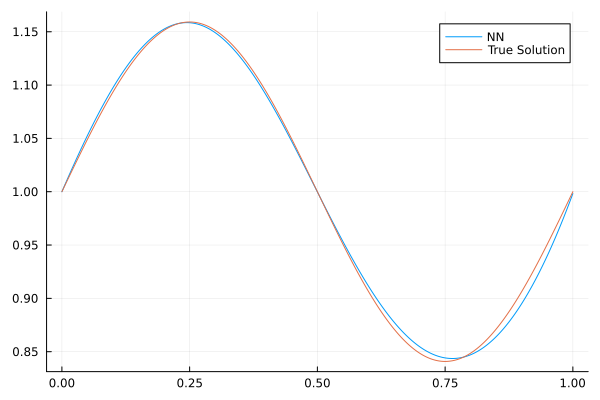

In [16]:
using Plots
t = 0:0.001:1.0
plot(t,g.(t),label="NN")
plot!(t,1.0 .+ sin.(2π.*t)/2π, label = "True Solution")

Another example

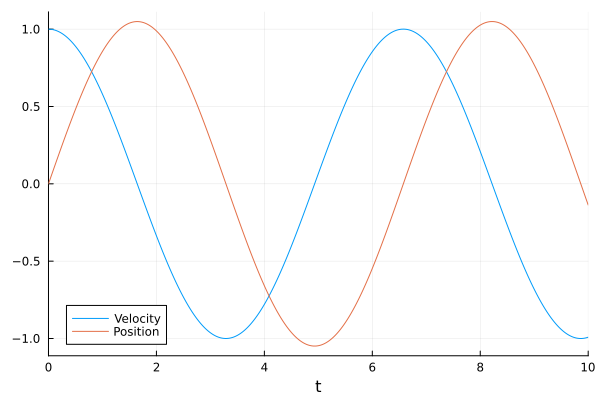

In [17]:
using DifferentialEquations, Plots
k = 1.0
force(dx,x,k,t) = -k*x + 0.1sin(x)
prob = SecondOrderODEProblem(force,1.0,0.0,(0.0,10.0),k)
sol = solve(prob)
plot(sol,label=["Velocity" "Position"])

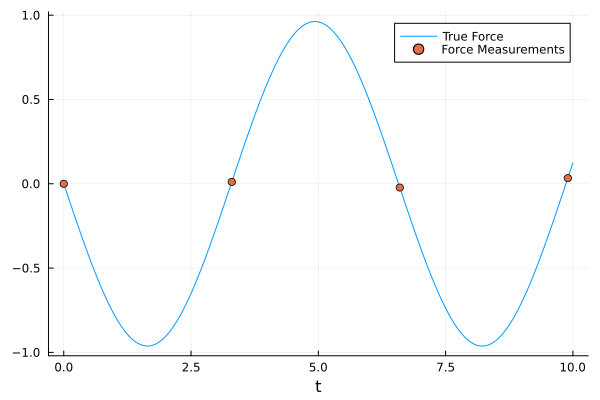

In [18]:
plot_t = 0:0.01:10
data_plot = sol(plot_t)
positions_plot = [state[2] for state in data_plot]
force_plot = [force(state[1],state[2],k,t) for state in data_plot]

# Generate the dataset
t = 0:3.3:10
dataset = sol(t)
position_data = [state[2] for state in sol(t)]
force_data = [force(state[1],state[2],k,t) for state in sol(t)]

plot(plot_t,force_plot,xlabel="t",label="True Force")
scatter!(t,force_data,label="Force Measurements")

In [19]:
NNForce = Chain(x -> [x],
           Dense(1 => 32,tanh),
           Dense(32 => 1),
           first)

Chain(
  var"#33#34"(),
  Dense(1 => 32, tanh),                 # 64 parameters
  Dense(32 => 1),                       # 33 parameters
  first,
)                   # Total: 4 arrays, 97 parameters, 644 bytes.

In [20]:
loss() = sum(abs2,NNForce(position_data[i]) - force_data[i] for i in 1:length(position_data))
loss()

0.0024049304317429188

In [21]:
opt = Flux.Descent(0.01)
data = Iterators.repeated((), 5000)
iter = 0
cb = function () #callback function to observe training
  global iter += 1
  if iter % 500 == 0
    display(loss())
  end
end
display(loss())
Flux.train!(loss, Flux.params(NNForce), data, opt; cb=cb)

0.0024049304317429188

0.001938964214485389

0.0016843185693884068

0.0014631942338833213

0.0012709454393639299

0.0011036670712239083

0.0009580478436253411

0.0008312573117495921

0.0007208683640052044

0.0006247778047582077

0.0005411640012477818

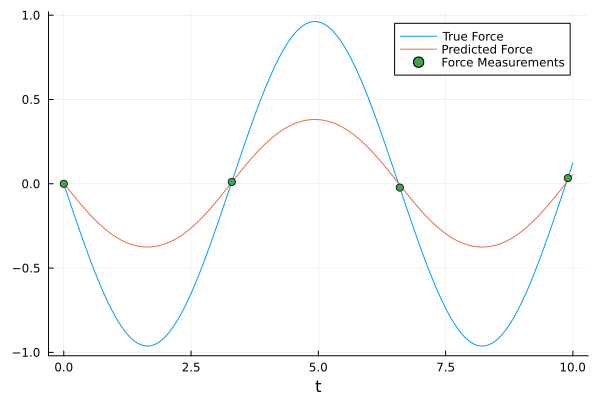

In [22]:
learned_force_plot = NNForce.(positions_plot)

plot(plot_t,force_plot,xlabel="t",label="True Force")
plot!(plot_t,learned_force_plot,label="Predicted Force")
scatter!(t,force_data,label="Force Measurements")

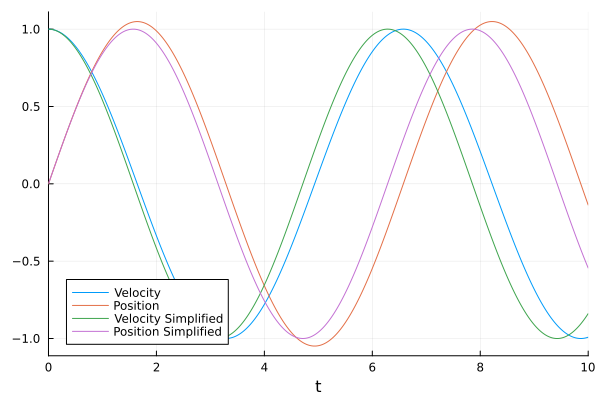

In [23]:
force2(dx,x,k,t) = -k*x
prob_simplified = SecondOrderODEProblem(force2,1.0,0.0,(0.0,10.0),k)
sol_simplified = solve(prob_simplified)
plot(sol,label=["Velocity" "Position"])
plot!(sol_simplified,label=["Velocity Simplified" "Position Simplified"])

In [24]:
random_positions = [2rand()-1 for i in 1:100] # random values in [-1,1]
loss_ode() = sum(abs2,NNForce(x) - (-k*x) for x in random_positions)
loss_ode()

12.754094000098348

In [25]:
λ = 0.1
composed_loss() = loss() + λ*loss_ode()

composed_loss (generic function with 1 method)

1.2759505640110826

0.0005039478053752409

0.0004799134104818656

0.0004580293464877798

0.00043800154243254006

0.00041960623687358763

0.0004026508995856387

0.00038697452733088566

0.0003724340675100872

0.0003589160663065179

0.000346314032341193

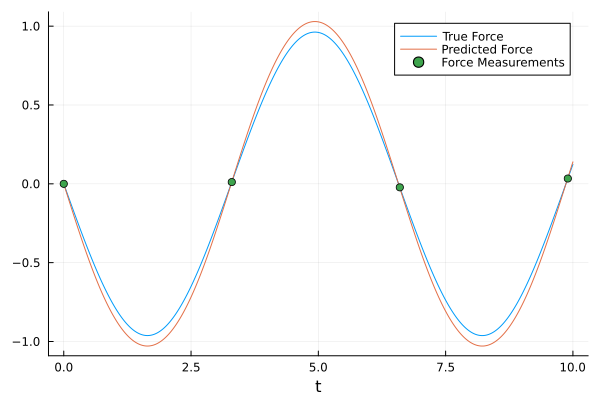

In [26]:
opt = Flux.Descent(0.01)
data = Iterators.repeated((), 5000)
iter = 0
cb = function () #callback function to observe training
  global iter += 1
  if iter % 500 == 0
    display(composed_loss())
  end
end
display(composed_loss())
Flux.train!(composed_loss, Flux.params(NNForce), data, opt; cb=cb)

learned_force_plot = NNForce.(positions_plot)

plot(plot_t,force_plot,xlabel="t",label="True Force")
plot!(plot_t,learned_force_plot,label="Predicted Force")
scatter!(t,force_data,label="Force Measurements")